In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle
from scipy.integrate import simpson

In [2]:
from utils.latticeeasy import *
from utils.label_utils import label_blobs, get_labels
from utils.oscillons import *
from utils.gmon import get_mass

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)

plt.rcParams['axes.axisbelow'] = True
rc('axes', **{'titlesize': 9})
rc('image', cmap='gist_heat_r')

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

# Load Data

In [4]:
key = "alpha_beta-0.5_50"
t_pr = 250.804626

# key = "alpha_beta-0.05_25"
# t_pr = 695.675659

output_pardir = f"/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/{key}"
data_par = LATTICEEASY(output_pardir)

output_dir = output_pardir + f"_{t_pr}/trial_2/smash_osc2_128_osc3_128_0.02"
data = LATTICEEASY(output_dir)

timeslice, = np.where(data_par.t==t_pr)[0]

In [5]:
assert all(data_par.a[timeslice]==data.a)

a = data.a[0]
A, B, r, s = data.rescale_A, data.rescale_B, data.rescale_r, data.rescale_s
c_pr = 1/(a**(data.rescale_s+1))
c_pr

0.008671595406120412

In [6]:
speeds = "0.02c"

In [7]:
timeslices = [i for i in range(data.t.size)][::2]
timeslices

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88]

# Look at oscillons

In [8]:
oscillons_fs = os.path.join(output_dir,"oscillons_dict_{}.p")

oscillons_gen = (pickle.load(open(oscillons_fs.format(data.t[timeslice]),'rb')) for timeslice in timeslices)

for timeslice, oscillons in zip(timeslices,oscillons_gen):
        
    fig, ax = plt.subplots(figsize=(6.3,4),tight_layout=True)
    
    mesh = ax.pcolormesh(oscillons[:,128].T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=.1, pad=0.1)
    cbar = fig.colorbar(mesh,cax=cax,)
    ax.set_aspect('equal')
    ax.set_title(f"t_pr = {data.t[timeslice]}")
    
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/trial_2/smash_osc2_128_osc3_128_0.02/oscillons_dict_4.99982.p'

# Load masses

In [10]:
masses_t_dict = pickle.load(open(os.path.join(output_dir,"masses_t_dict.p"),'rb'))

In [11]:
mass_thresh = 0.001

masses_t_dict_new = {}

for i, timeslice in enumerate(timeslices):
    masses = masses_t_dict[data.t[timeslice]]
    masses_t_dict_new[data.t[timeslice]] = masses[masses>mass_thresh]
    
    where = np.where(masses>mass_thresh)
    print(i, where)
    
    
#     print(i, masses_t_dict[data.t[timeslice]])

0 (array([0, 1]),)
1 (array([0, 1]),)
2 (array([0, 1]),)
3 (array([0, 1]),)
4 (array([0, 1]),)
5 (array([0, 1]),)
6 (array([0, 2]),)
7 (array([0]),)
8 (array([0]),)
9 (array([0]),)
10 (array([0]),)
11 (array([0]),)
12 (array([0]),)
13 (array([0]),)
14 (array([0]),)
15 (array([0]),)
16 (array([0]),)
17 (array([0]),)
18 (array([0]),)
19 (array([0]),)
20 (array([0]),)
21 (array([0]),)
22 (array([0]),)
23 (array([0]),)
24 (array([0]),)
25 (array([0]),)
26 (array([0]),)
27 (array([0]),)
28 (array([0]),)
29 (array([0]),)
30 (array([0]),)
31 (array([0]),)
32 (array([0]),)
33 (array([0]),)
34 (array([0]),)
35 (array([0]),)
36 (array([0]),)
37 (array([0]),)
38 (array([0]),)
39 (array([0]),)
40 (array([0]),)
41 (array([0]),)
42 (array([0]),)
43 (array([0]),)
44 (array([0]),)
45 (array([0]),)
46 (array([0]),)
47 (array([0]),)
48 (array([0]),)
49 (array([0]),)
50 (array([1]),)
51 (array([0]),)
52 (array([0]),)
53 (array([0]),)
54 (array([0]),)
55 (array([0]),)
56 (array([0]),)
57 (array([0]),)
58 

In [52]:
masses_t_dict_new

{2.500001: array([0.00738074, 0.00738074]),
 10.000412: array([0.007364, 0.007364]),
 15.002434: array([0.00732833, 0.00732833]),
 24.99789: array([0.00725526, 0.00725526]),
 34.992397: array([0.00726679, 0.00726679]),
 44.986904: array([0.00729944, 0.00729944]),
 54.981411: array([0.00728697, 0.00728697]),
 64.975914: array([0.01445357]),
 74.970421: array([0.01422351]),
 84.964928: array([0.01418468]),
 94.959435: array([0.01412565]),
 104.953941: array([0.01405601]),
 114.948448: array([0.01399977]),
 124.942955: array([0.01394706]),
 132.472717: array([0.01396091]),
 137.508118: array([0.01396641]),
 142.543518: array([0.01394667]),
 147.578918: array([0.01390226]),
 152.614319: array([0.01384406]),
 157.649719: array([0.01379027]),
 162.68512: array([0.01375358]),
 167.72052: array([0.01373348]),
 172.75592: array([0.01372626]),
 177.791321: array([0.01373302]),
 182.826721: array([0.01374921]),
 187.862122: array([0.01375834]),
 192.897522: array([0.01374737]),
 197.932922: array

In [57]:
separated_flat = []

for i, timeslice in enumerate(timeslices):
    masses = masses_t_dict_new[data.t[timeslice]]
    if len(masses)==2:
        separated_flat.append(i)

separated = [[]]
for i, idx in enumerate(separated_flat[:-1]):
    if separated_flat[i+1]-separated_flat[i]==1:
        separated[-1].append(idx)
    else:
        separated[-1].append(idx)
        separated.append([])
separated[-1].append(separated_flat[i+1])

separated_times = [[data.t[timeslices][t] for t in separated_t] for separated_t in separated]

merged = [[]]
count = 0
for t in range(len(timeslices)):
    if t not in separated_flat:
        merged[-1].append(t)
    else:
        if len(merged[-1])>0:
            merged.append([])
    
merged_times = [[data.t[timeslices][t] for t in merged_t] for merged_t in merged]

separated_times, merged_times

([[2.500001, 10.000412, 15.002434, 24.99789, 34.992397, 44.986904, 54.981411],
  [384.242737,
   389.278137,
   394.313538,
   399.348938,
   404.384338,
   409.419739,
   414.455139,
   419.49054,
   424.52594,
   429.56134,
   434.596741,
   439.632141,
   444.667542,
   449.702942,
   454.738342,
   459.773743]],
 [[64.975914,
   74.970421,
   84.964928,
   94.959435,
   104.953941,
   114.948448,
   124.942955,
   132.472717,
   137.508118,
   142.543518,
   147.578918,
   152.614319,
   157.649719,
   162.68512,
   167.72052,
   172.75592,
   177.791321,
   182.826721,
   187.862122,
   192.897522,
   197.932922,
   202.968323,
   208.003723,
   213.039124,
   218.074524,
   223.109924,
   228.145325,
   233.180725,
   238.216125,
   243.251526,
   248.286926,
   253.322327,
   258.357727,
   263.393127,
   268.428528,
   273.463928,
   278.499329,
   283.534729,
   288.570129,
   293.60553,
   298.64093,
   303.676331,
   308.711731,
   313.747131,
   318.782532,
   323.817932,
 

In [58]:
mass_T = []
mass_1 = []
mass_2 = []

for separated_t in separated:
    
    mass_1.append([])
    mass_2.append([])
    
    for timeslice in separated_t:
        masses = masses_t_dict_new[data.t[timeslices][timeslice]]
        
        mass_1[-1].append(masses[0])
        mass_2[-1].append(masses[1])

for timeslice in timeslices:
    
    masses = masses_t_dict[data.t[timeslice]]
    mass_T.append(sum(masses))
    
mass_T = np.array(mass_T)

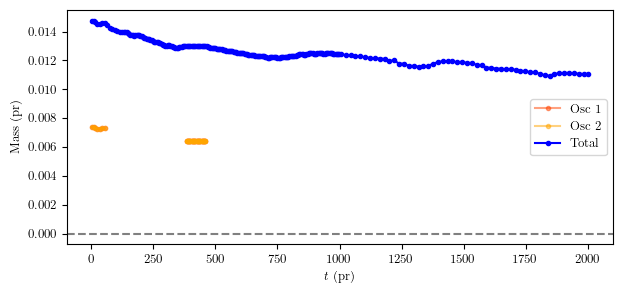

In [61]:
c_1 = "orangered"
c_2 = "orange"
c_T = "b"
label_1 = "Osc 1"
label_2 = "Osc 2"
label_T = "Total"

fig, ax = plt.subplots(1,1,figsize=(6.3,3),tight_layout=True)

for i,separated_time in enumerate(separated_times):
    
    if i==0:
        ax.plot(separated_time, mass_1[i], c=c_1, marker='.', label=label_1, alpha=.5)
        ax.plot(separated_time, mass_2[i], c=c_2, marker='.', label=label_2, alpha=.5)
    else:
        ax.plot(separated_time, mass_1[i], c=c_1, marker='.')
        ax.plot(separated_time, mass_2[i], c=c_2, marker='.')

ax.plot(data.t[timeslices], mass_T, c='b', marker='.', label=label_T)

ax.legend()
ax.set_xlabel(r"$t$ (pr)")
ax.set_ylabel(r"Mass (pr)")
# ax.set_ylim(-0.001,0.015)
ax.axhline(0,c='gray',ls='--')

plt.show()

# Load COMS, calculate velocity

In [62]:
coms_t_dict = pickle.load(open(os.path.join(output_dir,"coms_t_dict.p"),'rb'))

In [63]:
coms_t_dict

{2.500001: [array([0.25863191, 0.45241309, 0.45381412]),
  array([0.64251817, 0.45241309, 0.45381412])],
 10.000412: [array([0.25888651, 0.45243479, 0.45391447]),
  array([0.64226357, 0.45243479, 0.45391445])],
 15.002434: [array([0.25910406, 0.45244708, 0.453938  ]),
  array([0.64204601, 0.45244708, 0.453938  ])],
 24.99789: [array([0.25948362, 0.45251299, 0.45387398]),
  array([0.64166643, 0.45251298, 0.45387399])],
 34.992397: [array([0.25983486, 0.45247633, 0.45376963]),
  array([0.64131523, 0.45247632, 0.45376962])],
 44.986904: [array([0.26021283, 0.45246069, 0.45377829]),
  array([0.64093722, 0.45246066, 0.4537783 ])],
 54.981411: [array([0.26063749, 0.45246118, 0.45381705]),
  array([0.45057503, 0.44238737, 0.47807259]),
  array([0.64051257, 0.45246119, 0.45381701])],
 64.975914: [array([0.45057501, 0.45245515, 0.45385307])],
 74.970421: [array([0.45057502, 0.45250455, 0.45379391])],
 84.964928: [array([0.45057502, 0.45246137, 0.45371303])],
 94.959435: [array([0.45057503, 0.45

In [64]:
coms_t_dict_new = {}

for i, timeslice in enumerate(timeslices):
    
    masses = masses_t_dict[data.t[timeslice]]    
    where = np.where(masses>mass_thresh)
    
    coms_t = np.array(coms_t_dict[data.t[timeslice]])
    coms_t_dict_new[data.t[timeslice]] = coms_t[where]
    

In [71]:
coms_T = []
coms_1 = []
coms_2 = []

for separated_t in separated:
    
    coms_1.append([])
    coms_2.append([])
    
    for timeslice in separated_t:
        coms = coms_t_dict_new[data.t[timeslices][timeslice]].copy()
        
        for i, com in enumerate(coms):
            coms[i] = com-data.domain_width_pr[0]/2
        
        coms_1[-1].append(coms[0])
        coms_2[-1].append(coms[1])
        
for merged_t in merged:
    
    coms_T.append([])

    for timeslice in merged_t:
        
        coms = coms_t_dict_new[data.t[timeslices][timeslice]].copy()
        for i, com in enumerate(coms):
            coms[i] = com-data.domain_width_pr[0]/2
        masses = masses_t_dict_new[data.t[timeslices][timeslice]]
        
        if len(masses)==1:
            coms_T[-1].append(coms[0])
        else:
            coms_T[-1].append(coms[np.where(masses==max(masses))[0][0]])
            
for i, (com_1, com_2, com_T) in enumerate(zip(coms_1,coms_2, coms_T)):
    coms_1[i] = np.array(com_1)
    coms_2[i] = np.array(com_2)
    coms_T[i] = np.array(com_T)

In [72]:
coms_1, coms_2, coms_T

([array([[-1.93710094e-01,  7.10852524e-05,  1.47212168e-03],
         [-1.93455490e-01,  9.27890192e-05,  1.57246913e-03],
         [-1.93237944e-01,  1.05076734e-04,  1.59600464e-03],
         [-1.92858381e-01,  1.70994868e-04,  1.53198020e-03],
         [-1.92507138e-01,  1.34334900e-04,  1.42762582e-03],
         [-1.92129174e-01,  1.18691622e-04,  1.43629311e-03],
         [-1.91704508e-01,  1.19181960e-04,  1.47504906e-03]]),
  array([[-0.17272415,  0.00065733,  0.001428  ],
         [-0.17236297,  0.00067041,  0.0014535 ],
         [-0.17196819,  0.00066932,  0.00145419],
         [-0.17159838,  0.00066659,  0.00144168],
         [-0.17122851,  0.00065773,  0.00142099],
         [-0.17084392,  0.00064434,  0.00138643],
         [-0.1704616 ,  0.00062543,  0.00133758],
         [-0.17011259,  0.00060175,  0.00127923],
         [-0.16984096,  0.0005826 ,  0.00122514],
         [-0.16960518,  0.00057062,  0.00118845],
         [-0.16932385,  0.00056465,  0.00117032],
         [-0.1

In [78]:
velocity_1 = []
velocity_2 = []
velocity_T = []

for i, separated_time in enumerate(separated_times):
    
    velocity_1.append(np.diff(coms_1[i],axis=0)/np.tile(np.diff(separated_time),(3,1)).T)
    velocity_2.append(np.diff(coms_2[i],axis=0)/np.tile(np.diff(separated_time),(3,1)).T)
    
for i, merged_time in enumerate(merged_times):
    
    velocity_T.append(np.diff(coms_T[i],axis=0)/np.tile(np.diff(merged_time),(3,1)).T)

Text(0.5, -0.03, 'f')

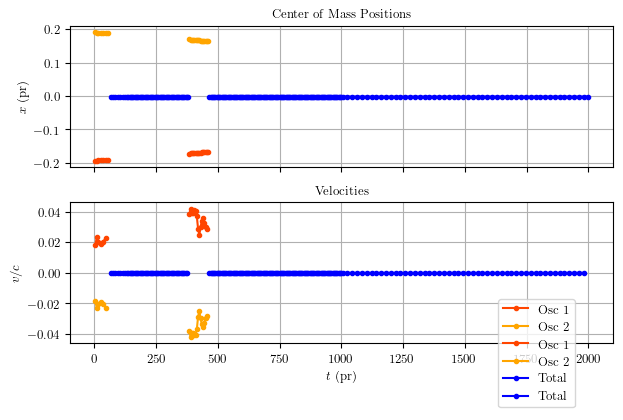

In [80]:
fig, axes = plt.subplots(2,1,figsize=(6.3,4),tight_layout=True,sharex=True)

for i, separated_time in enumerate(separated_times):
    axes[0].plot(separated_time,coms_1[i][:,0], marker='.', c=c_1, label=label_1)
    axes[0].plot(separated_time,coms_2[i][:,0], marker='.', c=c_2, label=label_2)
    
    axes[1].plot(separated_time[:-1],velocity_1[i][:,0]/c_pr, marker='.', c=c_1)
    axes[1].plot(separated_time[:-1],velocity_2[i][:,0]/c_pr, marker='.', c=c_2)

for i, merged_time in enumerate(merged_times):
    axes[0].plot(merged_time, coms_T[i][:,0], c='b', marker='.', label=label_T)
    
    axes[1].plot(merged_time[:-1], velocity_T[i][:,0], c='b', marker='.')
    
axes[0].set_title("Center of Mass Positions")
axes[0].set_ylabel(r"$x$ (pr)")
axes[1].set_title("Velocities")
axes[1].set_ylabel(r"$v/c$")
axes[1].set_xlabel(r"$t$ (pr)")
# axes[1].set_ylim(-0.027,0.027)

for ax in axes:
#     ax.legend()
    ax.grid()

fig.legend(loc=(0.8,0.03))
fig.text(.5,-0.03,'f',c='w')

# Plot

In [9]:
save_dir = "images_for_paper"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [10]:
idx = len([1 for s,t in zip(output_pardir, output_dir) if s==t])
t_pr = float(output_dir[idx+1:].split('/')[0])
timeslice, = np.where(data_par.t==t_pr)[0]
Edens_mean = load_energy(output_pardir,timeslice)[1:].sum()

In [11]:
plot_timeslices = [0,54,66]
data.t[plot_timeslices]

array([  4.99982 , 331.371033, 391.795837])

In [12]:
if os.path.exists(os.path.join(output_dir,"Eden projections y.p")):
# if 0:
    print("Loading projections")
    plot_times,Edens_max_y_t,Edens_proj_y_t,vmin_y,vmax_y = pickle.load(open(os.path.join(output_dir,"Eden projections y.p"),'rb'))
else:
    
    Edens_t = (data.get_Edens_pr(timeslice) for timeslice in plot_timeslices)
    dx_pr = (data.domain_width_pr[1]/data.domain_dimensions[1])
    
    print("Saving projections")
#     Edens_max_y_t = []
#     Edens_proj_y_t = []

    vmin_y, vmax_y = 0, 0

    for i, Edens in enumerate(Edens_t):

        print(i)

        Edens_max_y = Edens.max(axis=1)
        Edens_max_y_t.append(Edens_max_y)

        Edens_proj_y = simpson(Edens, dx=dx_pr, axis=1)
        Edens_proj_y_t.append(Edens_proj_y)
        
        vmin_y = Edens_proj_y.min() if vmin_y>Edens_proj_y.min() else vmin_y
        vmax_y = Edens_proj_y.max() if vmax_y<Edens_proj_y.max() else vmax_y
    
    plot_times = data.t[plot_timeslices]
    pickle.dump([plot_times,Edens_max_y_t,Edens_proj_y_t,vmin_y,vmax_y],open(os.path.join(output_dir,"Eden projections y.p"),'wb'))

Loading projections


In [13]:
mass = get_mass(data.alpha,data.beta)

0
1
2


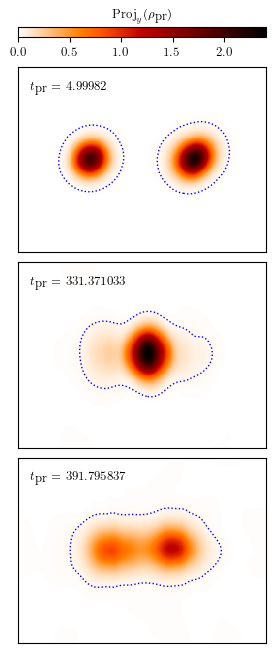

In [14]:
x, y, z = (np.linspace(0,width_pr/data.rescale_B,dim) for width_pr,dim in zip(data.domain_width_pr,data.domain_dimensions))
x, y, z = x*mass, y*mass, z*mass

L = np.max(x)

N_times = len(plot_times)

fig = plt.figure(figsize=(4,8))

grid = ImageGrid(fig, 111,
                 
                 nrows_ncols = (3,1),
                 axes_pad = .1,
                 cbar_location = "top",
                 cbar_mode="single",
                 cbar_size=.1,
                 cbar_pad=0.3,
                )

for j, grd in enumerate(grid):
    mesh = grd.pcolormesh(x,y,Edens_proj_y_t[j].T,vmin=vmin_y,vmax=vmax_y)
    grd.contour(x,y,Edens_max_y_t[j].T/Edens_mean,levels=[1],colors='b',linewidths=1., linestyles=':')
    cbar = fig.colorbar(mesh, cax=grid.cbar_axes[j//3],orientation='horizontal')
    cbar.ax.set_title(r"$\textrm{Proj}_{y}(\rho_{\textrm{pr}})$")
    
#     cbar.ax.label(r"$\textrm{Proj}_{y}(\rho_{\textrm{pr}})$")
    
    print(j)
    
    grd.get_xaxis().set_visible(False)
    grd.get_yaxis().set_visible(False)
    
#     if j<2:
#         grd.get_xaxis().set_visible(False)
#     if j==1:                         
#         grd.set_ylabel(r'$z/(am)$')
#     if j==2:
#         grd.set_xlabel(r'$x/(am)$')
        
    yticks = grd.get_yticks()[1:-1]
    grd.set_xticks(yticks)
    
    grd.text(L/21,L*25/32,r"$t_{\textrm{pr}}$ = "+f"{plot_times[j]}",c='k')
    grd.set_aspect('equal')
    grd.set_ylim(L/8,L*7/8)

# fig.text(0.47,0.06,r"$x$ (pr)") 
# fig.text(0.47,0.5,r"$x$ (pr)")
# fig.text(0.06,0.5,r"$z$ (pr)",rotation=90)

# plt.savefig(os.path.join(save_dir,f"test Collide oscillons grid {key}_{speeds} y flip.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()

In [15]:
data.t[80]

462.291443

In [16]:
Edens = data.get_Edens_pr(80)

from utils.gradient_utils import gradient_discrete

In [17]:
gradient = gradient_discrete(Edens, data.domain_width_pr/data.domain_dimensions, stencil=5)

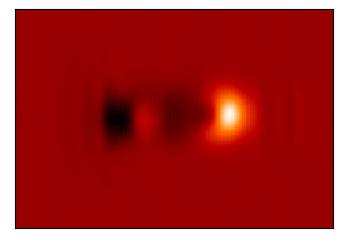

In [18]:
vals = (gradient[0][:,128])
# vals = Edens[:,128]
lim = max(vals.max(),abs(vals.min()))

fig, ax = plt.subplots(1,1,figsize=(3.5,3.5),tight_layout=True)

# im = ax.pcolormes78?h((Edens[1:,128]-Edens[:255,128]).T)
im = ax.pcolormesh(vals.T,
#                    vmin=-lim,vmax=lim
                  )
ax.set_aspect(1)

# ax.set_ylim(L/8,L*7/8)
ax.set_ylim(40,216)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# ax.text(10,190,r"$t_{\textrm{pr}}$ = "+f"{data.t[80]}",c='w')

plt.savefig(os.path.join(save_dir,f"waves.png"), bbox_inches='tight', facecolor='w', dpi=400)
plt.show()

In [19]:
gradient

[array([[[-2.34451610e-01, -2.44172652e-01, -2.47604839e-01, ...,
          -1.83846156e-01, -2.03951229e-01, -2.20450306e-01],
         [-1.84814842e-01, -1.93381391e-01, -2.01125474e-01, ...,
          -1.41017364e-01, -1.60492282e-01, -1.76192684e-01],
         [-1.31758458e-01, -1.39857979e-01, -1.45599197e-01, ...,
          -9.61691203e-02, -1.10002837e-01, -1.22407007e-01],
         ...,
         [-3.40486491e-01, -3.51329526e-01, -3.63320457e-01, ...,
          -2.73896069e-01, -3.00205557e-01, -3.20341630e-01],
         [-3.09622922e-01, -3.23433742e-01, -3.30832751e-01, ...,
          -2.46057420e-01, -2.75141674e-01, -2.94618303e-01],
         [-2.76297809e-01, -2.87068177e-01, -2.93751366e-01, ...,
          -2.18546413e-01, -2.40993100e-01, -2.58279404e-01]],
 
        [[-4.46037054e-02, -5.06032363e-02, -5.25598639e-02, ...,
          -6.33167701e-03, -2.13131867e-02, -3.39382713e-02],
         [-2.06292341e-04, -5.86233603e-03, -8.09679047e-03, ...,
           3.29006052

In [20]:
Edens[Edens>Edens_mean].sum()

1222802.6183241643

In [21]:
Edens_init = data.get_Edens_pr(0)

In [22]:
Edens_init[Edens_init>Edens_mean].sum()

1459339.6804843887

In [23]:
Edens_init.sum(), Edens.sum()

(1518612.222318171, 1518650.295436179)